#Introduction

1. What is ORB?
2. Why do we need ORB?
3. How does ORB work?
4. code - ORB


# 1. What is ORB?

* ORB - Oriednted FAST and Rotated BRIEF
* Feature detection method

# 2. Why do we need ORB?

* Feature detection
* Efficient/Low memory
* License restriction on SIFT/SURF


# 3. How does ORB work?

1. Fast Detector
    - Run `FAST detector` to get rough selection of features
![alt text](https://www.researchgate.net/publication/324590819/figure/fig1/AS:616761791623169@1524058878313/FAST-feature-detection-illustration-a-p-is-the-candidate-corner-pink-highlighted.png)

    - Narrow down to N Keypoints by using `Harris corners`
    - Apply `scale pyramid` to account for scale (steps a and b)

2. Orientation by Intensity Centroid
    - Moments are computed, which can be used to find the centroid and angle
![alt text](https://velog.velcdn.com/images/qtly_u/post/dec563a0-e163-436e-9f47-ee1660175ff5/image.png)

        - moments of a patch as:
$$
M_{pq} = \sum_{x} \sum_{y} x^p y^q I(x, y)
$$
        - and with these moments we may find the centroid:
$$
C = (\frac{M_{10}}{M_{00}}, \frac{M_{01}}{M_{00}})
$$
        - We cna construct a vector from the corner's center(O) to the centroid $(\vec{OC})$

3. Rotation of BRIEF
    - Use `BRIEF` to obtain the feature descriptor
    - `steer` BRIEF to find the correct orientation at `12 degree increments using a lookup table`:
    - Using the patch orientation $\theta$ and the corresponding rotaion matrix $R_{\theta}$, we construct a `steered` version $S_{\theta}$ of $S$:   
$$
S = \begin{pmatrix}
x_1 & x_2 & \cdots & x_n \\
y_1 & y_2 & \cdots & y_n
\end{pmatrix}
$$
    - 여기서 x, y는 2차원 좌표평면의 좌표가 아니라 `위치 쌍`을 의미함
$$
S_{\theta} = R_{\theta}S
$$
    - 회전된 $(S_{\theta})$에서 각 이진 테스트는 다음과 같이 수행:

$$
D[i] =
\begin{cases}
1 & \text{if } I(S_{\theta}(x_i)) < I(S_{\theta}(y_i)) \\
0 & \text{otherwise}
\end{cases}
$$

$$
D = [D[1], D[2], \ldots, D[n]]
$$



### Side notes: ORB(Oriented FAST and Rotated BRIEF)에서 특징점의 `size`

1. **FAST Corner Detection**
   - **기본 과정**: ORB는 먼저 FAST(Features from Accelerated Segment Test) 알고리즘을 사용하여 코너(또는 특징점)를 감지합니다.
   - **코너 검출에서의 Scale**: FAST는 기본적으로 고정된 스케일에서 동작합니다. 그러나 ORB는 이 과정을 이미지의 여러 스케일 피라미드 레벨에서 수행하여 다양한 크기의 특징점을 검출합니다. 이 과정에서 각 특징점의 스케일이 정의됩니다.

2. **Scale Pyramid**
   - **스케일 피라미드**: ORB는 입력 이미지를 다양한 스케일로 축소한 여러 버전(스케일 피라미드)을 만듭니다. 각 스케일에서 FAST를 적용하여 특징점을 검출합니다.
   - **특징점의 크기**: 특징점의 `size`는 해당 특징점이 검출된 스케일 피라미드 레벨에 따라 달라집니다. 높은 스케일 레벨에서 검출된 특징점은 더 작은 이미지에서 발견되었기 때문에 `size`가 작게 설정되며, 낮은 스케일 레벨에서 검출된 특징점은 더 큰 이미지에서 발견되었기 때문에 `size`가 크게 설정됩니다.
   
4. **결론**
    - ORB의 `size`는 주로 **이미지 스케일 피라미드 레벨**과 관련이 있으며, **특정 스케일에서 검출된 특징점의 크기**를 나타냅니다. 이는 해당 스케일에서의 코너 검출의 결과로 결정됩니다. 따라서, `size`는 특징점이 검출된 이미지 스케일에 따라 변화하며, 이미지의 해상도나 스케일이 달라짐에 따라 달라질 수 있습니다.

len(kp)= 92
len(filtered_kp)= 12
des.shape= (12, 32)
des= [[  2 141  34 158 212 131 174 230  22   1  88   2  40 232  48  64 120 107
   19 193 194 186   8 255  40  36 142 200  21  10 240 136]
 [  2 141   2 158 148 131 142 231   4   0  88   2  32 234  48  64  72 106
   19 193  82 168   0 255  40  36 142 192  21  30 176 136]
 [  2 141  34 158 148 131 174 231  22   0  88   2  32 234  48  64 120 107
   19 193 210 186   0 255  40  38 142 192  21  10 176 136]
 [104  48 120 225  37  13  88  16 105  40 182   8 159  27   0  16 198 149
  125   8 136  98 193 128 199 249  32 176  66 136  66   3]
 [120  48 112 224  45  13  88  16  47 168 182  40 159  27   0  16 142 149
  221   8 136  98 192 208 211 249  35 176  66 128  66   3]
 [120  48 120 224  45  29  88  16 105  40 182  40 159  27   0  16 142 149
  253   8 136  98 225 128 211 249  33 176  66 128  66   3]
 [120  48  56 224  45  29  88  16 105  40 182   8 159  31   0  80 134 149
  253   8 136  96 241 128 211 249  33 178  66 128  67   3]
 [  2 141  

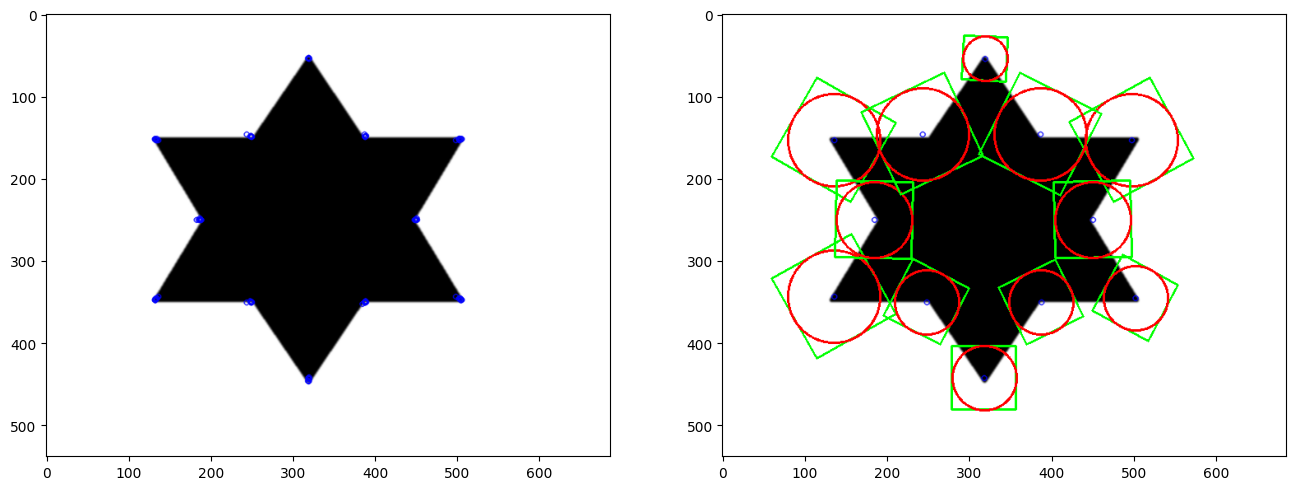

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools

#1
def distance(f1, f2):
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

#반응값 순서가 아니라 먼저 나오는 특징값 우선으로 살림.
def filteringByDistance(kp, distE=0.5):
    size = len(kp)

    #순서 없는 조합 생성 방법
    mask = np.arange(1, size + 1).astype(np.bool_) #all True
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else:  #True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2) < distE:
                    mask[j] = False

    np_kp = np.array(kp)
    return list(np_kp[mask])


#이건 독립된 점을 추가하지 못함.
def filteringByDistance_itertools(kp, distE=0.5):
    size = len(kp)
    np_kp = np.array(kp)

    #순서 없는 조합 생성 방법
    mask = np.zeros(size, dtype=bool) #all False

    combination = list(itertools.combinations(range(size), 2))
    for idx1, idx2 in combination:
        f1 = kp[idx1]
        f2 = kp[idx2]
        if distance(f1, f2) < distE:
            mask[idx2] = True
            if mask[idx2] == True and mask[idx1] == True:
                mask[idx1] = False

    return list(np_kp[mask])


#2
#이미지 불러오기
src = cv2.imread('/content/drive/MyDrive/Image/6_corner_star.PNG')
#BRG 이미지를 GRAY로 변환. (channel = 1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#이미지 블러처리 cv2.GaussianBlur( 이미지, 커널 사이즈, 시그마)
#시그마가 0이면 kernel 사이즈에 맞춰 알아서 연산
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

#orbF = cv2.ORB_create()  #Harris_Score

#ORB 검출기 객체 형성. (FAST 응답결과를 바탕으로 검출)
orbF = cv2.ORB.create(scoreType=1)  #FAST_score

#검출기.detect -> 특징점 검출 (N개의 keypoint)
kp = orbF.detect(gray, None)

print('len(kp)=', len(kp))

#drawKeypoints(이미지, 특징점 N개 , 출력 이미지, 색상)
dst = cv2.drawKeypoints(gray, kp, None, color = (0, 0, 255))

#3
#filter, sorted, map 은 list 같이 iterable 한 객체를 처리할때 유용하다.
#sorted(iterable, key=None, reverse=False)
#iterable은 반복 가능한 객체(리스트, 튜플, 문자열)
#key는 정렬 기준이 되는 함수-
#reverse는 정렬 순서 (True : 내림차순)


#N개의 keypoint를 응답값에 따라 정렬
kp = sorted(kp, key = lambda f: f.response, reverse = True)

#응답값이 50이 넘는 keypoint만 따로 리스트화
filtered_kp = list(filter(lambda f: f.response > 50, kp))

#kp간 거리 임계치 설정
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

#검출기.compute 하면 디스크립터 나옴.(특징점 당 256비트)
kp, des = orbF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color = (0, 0, 255))
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0, 255, 0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size / 2), (255, 0, 0), 2)

fig, axs = plt.subplots(1, 2, figsize = (16, 8))
axs[0].imshow(dst)
axs[1].imshow(dst2)
plt.show()

### 1. **특징점 검출 알고리즘**
특징점 검출 알고리즘은 이미지 내에서 중요한 포인트(예: 코너, 에지, 블랍 등)를 찾아냅니다. 이 포인트들은 주로 이미지의 회전이나 조명 변화에 강인하여 이미지 매칭이나 객체 인식에 사용됩니다. 코드에서는 다음 네 가지 알고리즘을 사용합니다:

1. **FAST (Features from Accelerated Segment Test)**
   - **특징**: 매우 빠른 코너 검출 알고리즘으로, 간단한 임계값 기반 비교를 사용하여 코너를 찾아냅니다.
   - **결과**: FAST는 주로 코너와 같은 급격한 밝기 변화가 있는 지점을 잘 검출합니다. 그러나 잡음에도 민감할 수 있습니다.

2. **MSER (Maximally Stable Extremal Regions)**
   - **특징**: 이미지에서 밝기가 일정한 영역을 추출하는 블랍(blobs) 검출 알고리즘입니다.
   - **결과**: MSER는 이미지의 텍스트나 물체 내부의 균일한 영역을 잘 검출합니다. 복잡한 배경에서는 잡음이 많이 포함될 수 있습니다.

3. **SimpleBlobDetector**
   - **특징**: 블랍을 찾는 데 특화된 알고리즘으로, 원형이나 타원형의 밝은 영역을 검출합니다.
   - **결과**: 원형의 밝은 영역이 있는 이미지에서 잘 동작하지만, 복잡한 형태나 코너는 잘 검출하지 못합니다.

4. **Good Features to Track (GFTT)**
   - **특징**: Shi-Tomasi 방법을 사용하여 강한 코너를 검출하는 알고리즘입니다.
   - **결과**: 움직이는 물체를 추적하거나 코너 검출에 유리합니다. 특징점의 분포가 비교적 균등하게 나오며, 잘 추적될 수 있는 포인트를 선정합니다.

### 2. **ORB 디스크립터 계산**
ORB(Oriented FAST and Rotated BRIEF)는 FAST 특징점과 BRIEF 디스크립터를 결합한 알고리즘으로, 특징점의 방향과 회전에 강인한 디스크립터를 제공합니다. 필터링된 특징점들에 대해 ORB 디스크립터를 계산하여, 각각의 특징점이 주변 환경에 대해 어떤 특징을 갖고 있는지 표현합니다.

- **결과 차이**:
  - **FAST**: 코너가 많은 영역에서 많은 특징점을 검출하고, 디스크립터가 복잡한 패턴을 잘 표현합니다.
  - **MSER**: 균일한 밝기 영역에서 특징점을 검출하므로, 디스크립터가 이러한 영역의 내부 특징을 잘 표현합니다.
  - **SimpleBlobDetector**: 원형 블랍에 특화된 디스크립터가 생성되며, 단순한 구조를 갖습니다.
  - **GFTT**: 추적하기 좋은 포인트에 대한 디스크립터를 제공하며, 복잡한 코너와 모서리에 대한 정보가 포함됩니다.

### 3. **결과 시각화**
결과적으로, 각 알고리즘으로 검출된 특징점과 해당 디스크립터는 이미지에 시각적으로 표시됩니다. 이 과정에서 각 특징점의 위치와 크기, 방향이 반영된 그래픽이 이미지 위에 그려집니다.

- **비교**:
  - **FAST**와 **GFTT**는 코너를 잘 잡지만, **MSER**와 **SimpleBlobDetector**는 좀 더 큰 영역을 포착합니다.
  - ORB 디스크립터는 각 특징점 주변의 패턴을 반영한 결과를 제공하여, 매칭이나 인식에 강력한 정보를 제공합니다.

Descriptor 1 shape: (85, 32)
Descriptor 2 shape: (63, 32)
Descriptor 3 shape: (35, 32)
Descriptor 4 shape: (50, 32)


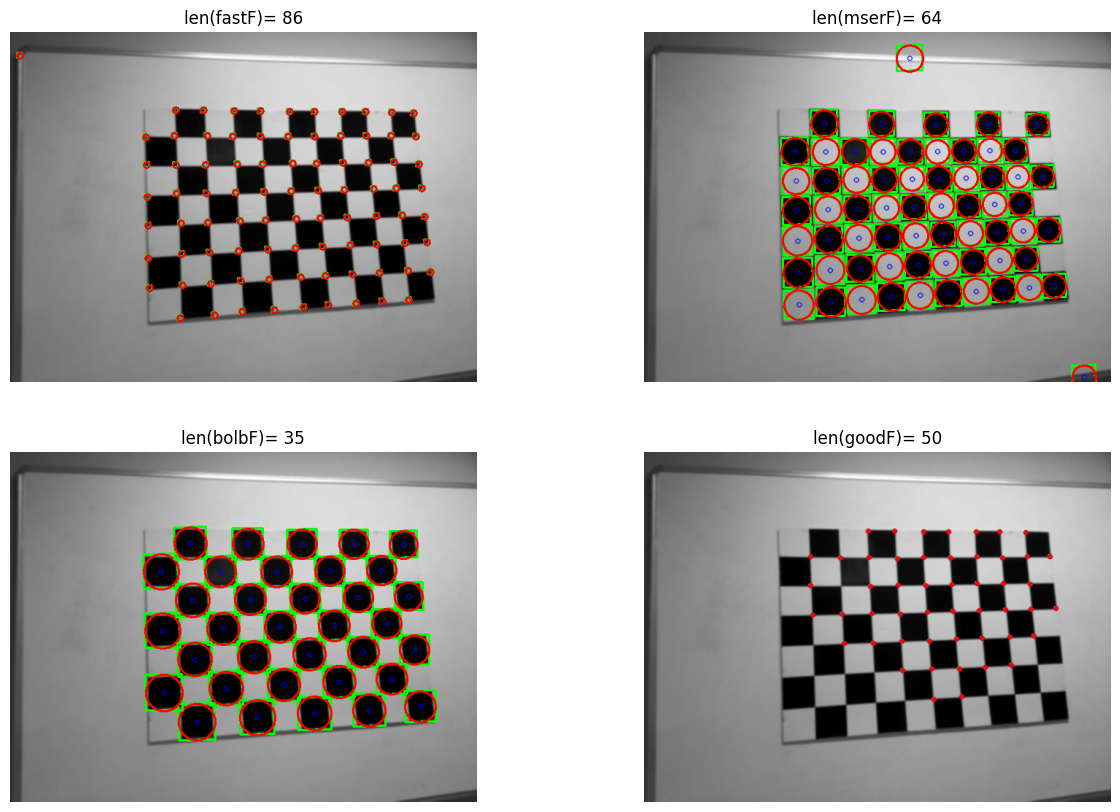

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def distance(f1, f2):
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1, size + 1).astype(np.bool_)  # 모두 True로 시작
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        for j, f2 in enumerate(kp):
            if i == j:
                continue
            if distance(f1, f2) < distE:
                mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

gray = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image/chessboard.jpg의 사본'), cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

# 키포인트 감지기 초기화
fastF = cv2.FastFeatureDetector.create(threshold=30)
mserF = cv2.MSER.create()
bolbF = cv2.SimpleBlobDetector.create()
goodF = cv2.GFTTDetector.create(maxCorners=50, minDistance=10)

# 키포인트 검출
fastF_kp = fastF.detect(gray, None)
mserF_kp = mserF.detect(gray, None)
bolbF_kp = bolbF.detect(gray, None)
goodF_kp = goodF.detect(gray, None)

# 필터링된 키포인트 저장
filtered_fastF_kp = filteringByDistance(fastF_kp, 10)
filtered_mserF_kp = filteringByDistance(mserF_kp, 10)
filtered_bolbF_kp = filteringByDistance(bolbF_kp, 10)
filtered_goodF_kp = filteringByDistance(goodF_kp, 10)

filtered_kp = [filtered_fastF_kp, filtered_mserF_kp, filtered_bolbF_kp, filtered_goodF_kp]

# ORB 디스크립터 생성
orb = cv2.ORB.create()

# 디스크립터 계산
orb_descriptors = []
for kp in filtered_kp:
    _, des = orb.compute(gray, kp)
    orb_descriptors.append(des)

for i, des in enumerate(orb_descriptors):
    print(f"Descriptor {i+1} shape: {des.shape}")

# 이미지를 저장할 리스트 초기화
dst = [None] * 4
dst[0] = cv2.drawKeypoints(gray, filtered_fastF_kp, None, color=(0, 0, 255))
dst[1] = cv2.drawKeypoints(gray, filtered_mserF_kp, None, color=(0, 0, 255))
dst[2] = cv2.drawKeypoints(gray, filtered_bolbF_kp, None, color=(0, 0, 255))
dst[3] = cv2.drawKeypoints(gray, filtered_goodF_kp, None, color=(0, 0, 255))

for i, kp_set in enumerate(filtered_kp):
    for f in kp_set:
        x, y = f.pt
        size = f.size
        rect = ((x, y), (size, size), f.angle)
        box = cv2.boxPoints(rect).astype(np.int32)
        cv2.polylines(dst[i], [box], True, (0, 255, 0), 2)
        cv2.circle(dst[i], (round(x), round(y)), round(f.size / 2), (255, 0, 0), 2)

# 결과 표시
#서브플롯으로 이미지 표시
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
titles = ['fastF', 'mserF', 'bolbF', 'goodF']

for i, image in enumerate(dst):
    axs[i // 2][i % 2].imshow(image)
    axs[i // 2][i % 2].axis('off')  # 축을 끔
    axs[i // 2][i % 2].set_title(f'len({titles[i]})= {len(globals()[f"filtered_{titles[i]}_kp"])}')



In [ ]:
#3
orbF = cv2.ORB.create()

kp, des = orbF.compute(gray, filtered_kp[i])

print('des.shape=', des.shape)
print('des=', des)

des.shape= (50, 32)
des= [[130 164 156 ...  68 141 206]
 [ 42 160 180 ...  76 143 206]
 [  2 164 148 ...  68 141 206]
 ...
 [  6  67  18 ...  55  45  67]
 [ 14  65  55 ...  55  37 115]
 [138 172 188 ...  76 143 206]]


# BRISK

len(kp)= 30
len(filtered_kp)= 11
des.shape= (11, 64)


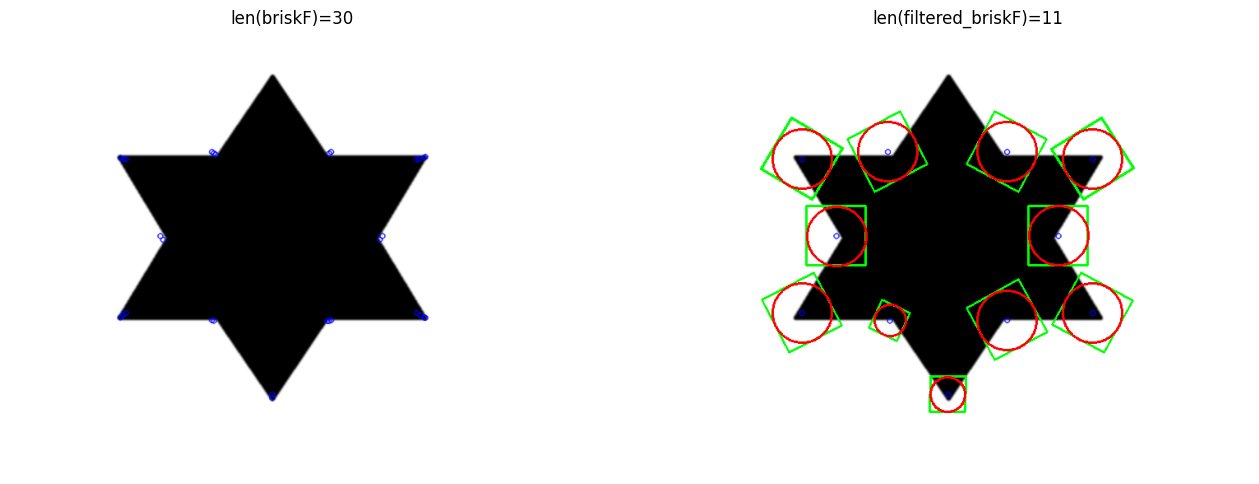

In [ ]:
import cv2
import numpy as np

#1
def distance(f1, f2):
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

#반응값 순서가 아니라 먼저 나오는 특징값 우선으로 살림.
def filteringByDistance(kp, distE=0.5):
    size = len(kp)

    #순서 없는 조합 생성 방법
    mask = np.arange(1, size + 1).astype(np.bool_) #all True
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else:  #True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2) < distE:
                    mask[j] = False

    np_kp = np.array(kp)
    return list(np_kp[mask])


#이건 독립된 점을 추가하지 못함.
def filteringByDistance_itertools(kp, distE=0.5):
    size = len(kp)
    np_kp = np.array(kp)

    #순서 없는 조합 생성 방법
    mask = np.zeros(size, dtype=bool) #all False

    combination = list(itertools.combinations(range(size), 2))
    for idx1, idx2 in combination:
        f1 = kp[idx1]
        f2 = kp[idx2]
        if distance(f1, f2) < distE:
            mask[idx2] = True
            if mask[idx2] == True and mask[idx1] == True:
                mask[idx1] = False

    return list(np_kp[mask])

#2
src = cv2.imread('/content/drive/MyDrive/Image/6_corner_star.PNG')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

#briskF = cv2.BRISK_create()
briskF = cv2.BRISK.create()
kp = briskF.detect(gray, None)

print('len(kp)=', len(kp))

dst = cv2.drawKeypoints(gray, kp, None, color = (0, 0, 255))


#3
kp = sorted(kp, key = lambda f: f.response, reverse=True)
filtered_kp = list(filter(lambda f: f.response > 50, kp))
filtered_kp = filteringByDistance(kp, 20)

print('len(filtered_kp)=', len(filtered_kp))

filtered_kp, des = briskF.compute(gray, filtered_kp)
print('des.shape=', des.shape)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0, 0, 255))
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0, 255, 0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size / 2), (255, 0, 0), 2)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(dst)
axs[0].axis('off')
axs[0].set_title(f'len(briskF)={len(kp)}')

axs[1].imshow(dst2)
axs[1].axis('off')
axs[1].set_title(f'len(filtered_briskF)={len(filtered_kp)}')

plt.imshow(dst2)
plt.show()

### 1. **키포인트 검출 방식의 차이**

- **ORB (Oriented FAST and Rotated BRIEF)**:
  - ORB는 코너 검출기인 FAST(Features from Accelerated Segment Test)를 사용하여 키포인트를 찾습니다. 코너는 이미지의 방향이 급격히 바뀌는 지점으로 정의되므로, 이미지의 모든 코너를 잘 검출합니다.
  - 별 모양과 같은 형태에서 각 꼭짓점은 좋은 코너 특성을 가집니다. 따라서 ORB는 이러한 점들을 잘 찾을 수 있습니다.

- **BRISK (Binary Robust Invariant Scalable Keypoints)**:
  - BRISK는 FAST와 유사한 방법으로 키포인트를 검출하지만, 더 높은 스케일 불변성과 회전 불변성을 제공하는 것을 목표로 합니다.
  - BRISK는 특정 크기와 강도에서만 반응하도록 설계되어 있으므로, 특정 형태(예: 별의 가장자리)가 아닌 전체 이미지의 강도 분포에 따라 키포인트를 선택합니다. 이로 인해 별의 꼭짓점과 같이 미세한 특성이 있는 지점에서 검출하지 못할 수 있습니다.



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def distance(f1, f2):
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1, size + 1).astype(np.bool_)  # 모두 True로 시작
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        for j, f2 in enumerate(kp):
            if i == j:
                continue
            if distance(f1, f2) < distE:
                mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

gray = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image/chessboard.jpg의 사본'), cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

# 키포인트 감지기 초기화
fastF = cv2.FastFeatureDetector.create(threshold=30)
mserF = cv2.MSER.create()
bolbF = cv2.SimpleBlobDetector.create()
goodF = cv2.GFTTDetector.create(maxCorners=50, minDistance=10)

# 키포인트 검출
fastF_kp = fastF.detect(gray, None)
mserF_kp = mserF.detect(gray, None)
bolbF_kp = bolbF.detect(gray, None)
goodF_kp = goodF.detect(gray, None)

# 필터링된 키포인트 저장
filtered_fastF_kp = filteringByDistance(fastF_kp, 10)
filtered_mserF_kp = filteringByDistance(mserF_kp, 10)
filtered_bolbF_kp = filteringByDistance(bolbF_kp, 10)
filtered_goodF_kp = filteringByDistance(goodF_kp, 10)

filtered_kp = [filtered_fastF_kp, filtered_mserF_kp, filtered_bolbF_kp, filtered_goodF_kp]

# ORB 디스크립터 생성
brisk = cv2.BRISK.create()

# 디스크립터 계산
brisk_descriptors = []
for kp in filtered_kp:
    _, des = brisk.compute(gray, kp)
    brisk_descriptors.append(des)

for i, des in enumerate(brisk_descriptors):
    print(f"Descriptor {i+1} shape: {des.shape}")



Descriptor 1 shape: (86, 64)
Descriptor 2 shape: (62, 64)
Descriptor 3 shape: (35, 64)
Descriptor 4 shape: (50, 64)


# KAZE & AKAZE

### KAZE의 기본 개념

1. **특징점 검출**:
   - KAZE는 이미지를 분석하여 중요한 지점, 즉 **특징점**을 찾아냅니다. 특징점은 이미지에서 독특하고 뚜렷한 부분으로, 이미지 인식이나 추적에 유용합니다.

2. **블러링과 잡음 감소**:
   - 기존의 스케일 공간 특징점 검출방법의 가우시안 피라미드에 의한 방법은 잡음 제거 뿐만 아니라, 물체의 detail 역시 악화시킵니다.
   - KAZE는 비선형 확산 필터링(nonliner diffusion filtering)으로 특징점을 검출하고 디스크립터를 계산합니다.
   - 비선형 필터링을 통해 특징점 검출의 정확도가 높아집니다.

3. **Hessian Matrix 사용**:
   - KAZE는 **Hessian Matrix**의 **scaled normalized determinant**를 기반으로 특징점을 검출합니다.

4. **특징점 선택**:
   - 알고리즘은 특정 **윈도우**(작은 영역)를 이동시키며, 이 지역에서 가장 큰 응답 값을 가진 지점을 **특징점**으로 선택합니다. 즉, 강한 특징이 있는 위치를 찾아내는 과정입니다. (`비최대 억제`)

5. **Descriptor 생성**
   - `Local Gradient Histogram`을 사용하여 서술자를 생성합니다.
   - 각 subregion은 Gradient에 관한 4개의 값을 가지며, 일반적으로 subregion이 4*4 형태이므로 디스크립터 벡터의 크기는 64 * 4byte, 즉 256 byte입니다.

5. **회전 불변성**:
   - KAZE는 각 특징점을 둘러싼 **원형 영역**에서 **dominant orientation**(주된 방향)을 찾아냅니다. 이렇게 하면, 이미지가 회전되더라도 같은 특징점을 찾을 수 있게 됩니다. 즉, 이미지가 어떻게 회전하든 KAZE는 특징점을 잘 인식할 수 있습니다.

6. **크기와 한정된 변환에 대한 불변성**:
   - KAZE는 다양한 **크기**(scale)와 **한정된 어파인 변환**(affine transformation)에 불변합니다. 즉, 이미지가 확대되거나 축소되거나 기울어져도, KAZE는 여전히 같은 특징점을 검출할 수 있습니다.

7. **연산 시간**:
   - KAZE는 SIFT와 비슷하고 SURF에 비해 느린 연산 속도를 갖습니다.


### AKAZE의 기본 개념

1. **Non-Linear Diffusion Filtering**:
   - **AKAZE** 도 마찬가지로 **비선형 확산 필터링 방식**을 사용합니다.
   - **Fast Explicit Diffusion (FED)**라는 효율적인 프레임워크를 사용하여 연산 속도를 높입니다. 즉, 빠르게 이미지를 필터링할 수 있습니다.

2. **Scharr Filter 사용**:
   - AKAZE는 **Scharr 필터**를 사용하여 이미지의 엣지를 강조합니다. 이 필터는 회전 불변성을 향상시키는데 도움을 주어, 이미지가 회전되더라도 같은 특징점을 잘 인식할 수 있도록 합니다.

4. **Descriptor 생성**:
   - AKAZE는 이진 테스트(Modified Local Difference Binary) 방식을 사용하여 특징점의 서술자를 생성합니다.

6. **불변성**:
   - AKAZE는 **크기**(scale), **회전**(rotation), 그리고 **한정된 어파인 변환**(limited affine transformation)에 대해 불변성을 가집니다. 이는 이미지의 크기나 방향이 바뀌어도 같은 특징점을 잘 찾을 수 있다는 의미입니다.

   - 비선형 척도 공간 덕분에 다양한 크기에서 더욱 **distinctive**(독특한) 특징점을 찾아낼 수 있습니다.

### 결론

- AKAZE는 KAZE의 장점을 기반으로 하여 FED를 통해 필터링 속도를 높이고, Scharr 필터를 통해 검출 성능을 향상시킵니다.

- Modified Local Difference Binary 알고리즘을 통해 특징점 정보를 효과적으로 표현합니다.


비선형 확산 필터


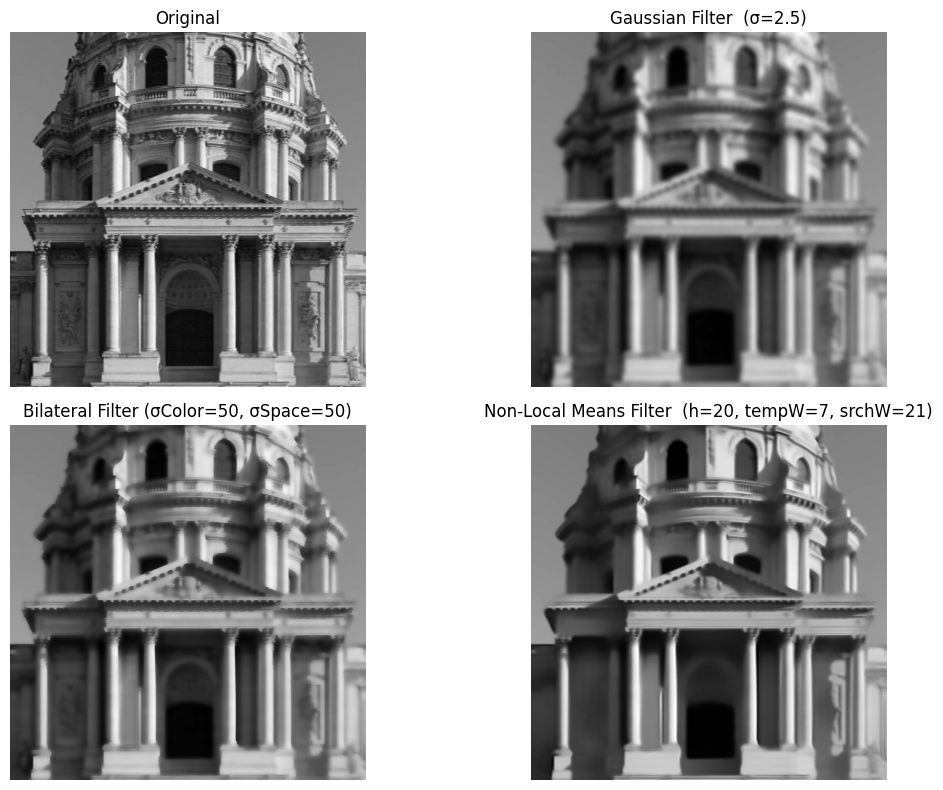

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image = cv2.imread('/content/drive/MyDrive/Image/architect2_400.jpg', cv2.IMREAD_GRAYSCALE)

print('비선형 확산 필터')

# 1단계: 원본 이미지
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

# 2단계: Gaussian Filter 적용
gaussian_filtered = cv2.GaussianBlur(image, (0, 0), 2.5)
plt.subplot(2, 2, 2)
plt.title('Gaussian Filter  (σ=2.5)')  # 수정된 부분
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

# 3단계: Bilateral Filter 적용
bilateral_filtered = cv2.bilateralFilter(image, d=9, sigmaColor=50, sigmaSpace=50)
plt.subplot(2, 2, 3)
plt.title('Bilateral Filter (σColor=50, σSpace=50)')  # 수정된 부분
plt.imshow(bilateral_filtered, cmap='gray')
plt.axis('off')

# 4단계: Non-Local Means Filter 적용
nlm_filtered = cv2.fastNlMeansDenoising(image, None, 20, 7, 21)
plt.subplot(2, 2, 4)
plt.title('Non-Local Means Filter  (h=20, tempW=7, srchW=21)')  # 수정된 부분
plt.imshow(nlm_filtered, cmap='gray')
plt.axis('off')

# 결과를 출력
plt.tight_layout()
plt.show()

len(kp)= 114
len(kp)= 68
len(filtered_kaze_kp)= 16
len(filtered_akaze_kp)= 13
kaze_descriptor.shape= (16, 64)
kaze_descriptor.type= float32
akaze_descriptor.shape= (13, 61)
akaze_descriptor.type= uint8


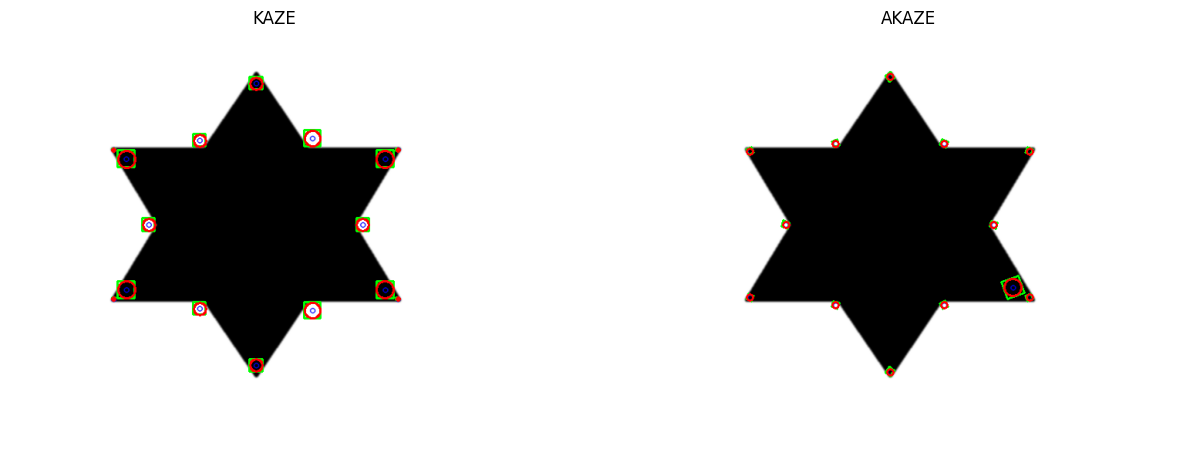

In [ ]:
import cv2
import numpy as np
from typing import List
import matplotlib.pyplot as plt


def distance(f1, f2):
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1, size + 1).astype(np.bool_)  # 모두 True로 시작
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        for j, f2 in enumerate(kp):
            if i == j:
                continue
            if distance(f1, f2) < distE:
                mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

#2
src = cv2.imread('/content/drive/MyDrive/Image/6_corner_star.PNG')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

kazeF = cv2.KAZE.create()
akazeF = cv2.AKAZE.create()

kp = [None]*2
kp[0] = kazeF.detect(gray, None)
kp[1] = akazeF.detect(gray, None)

print('len(kp)=', len(kp[0]))
print('len(kp)=', len(kp[1]))

dst = [None]*2
dst[0] = cv2.drawKeypoints(gray, kp[0], None, color = (0, 0, 255))
dst[1] = cv2.drawKeypoints(gray, kp[1], None, color = (0, 0, 255))

#3
filtered_kp = [None]*2
kp[0] = sorted(kp[0], key = lambda f: f.response, reverse = True)
filtered_kp[0] = list(filter(lambda f: f.response > 0.01, kp[0]))
filtered_kp[0] = filteringByDistance(filtered_kp[0], 20)

kp[1] = sorted(kp[1], key = lambda f: f.response, reverse = True)
filtered_kp[1] = list(filter(lambda f: f.response > 0.01, kp[1]))
filtered_kp[1] = filteringByDistance(filtered_kp[1], 20)

print('len(filtered_kaze_kp)=', len(filtered_kp[0]))

print('len(filtered_akaze_kp)=', len(filtered_kp[1]))

des = [None]*2
des[0] = kazeF.compute(gray, filtered_kp[0])[1]
des[1] = akazeF.compute(gray, filtered_kp[1])[1]

print('kaze_descriptor.shape=', des[0].shape)
print('kaze_descriptor.type=', des[0].dtype)

print('akaze_descriptor.shape=', des[1].shape)
print('akaze_descriptor.type=', des[1].dtype)

#4
dst = [None]*2
dst[0] = cv2.drawKeypoints(gray, filtered_kp[0], None, color = (0, 0, 255))
dst[1] = cv2.drawKeypoints(gray, filtered_kp[1], None, color = (0, 0, 255))

for i, kp_set in enumerate(filtered_kp):
    for f in kp_set:
        x, y = f.pt
        size = f.size
        rect = ((x, y), (size, size), f.angle)
        box = cv2.boxPoints(rect).astype(np.int32)
        cv2.polylines(dst[i], [box], True, (0, 255, 0), 2)
        cv2.circle(dst[i], (round(x), round(y)), round(f.size / 2), (255, 0, 0), 2)

# 결과 표시
#서브플롯으로 이미지 표시
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
titles = ['KAZE', 'AKAZE']

for i, image in enumerate(dst):
    axs[i].imshow(image)
    axs[i].axis('off')  # 축을 끔
    axs[i].set_title(f'{titles[i]}')


# 디스크립터를 이용한 특징 매칭



## 특징 매칭 방법

* 특징 디스크립터 매칭 클래스 구조
    - DMatch : 특징점 매칭 결과를 저장하는 구조체
    - DescriptorMatcher : 매칭을 위한 추상 기반클래스 (abstract class)
        - BFMatcher : 디스크립터를 하나씩 모두 검사하여 가장 가까운 디스크립터를 찾는다.
        - FlannBasedMatcher : Fast library for Approximate Near Neighbors

* 특징점 매칭 과정
    1. query, train 이미지에서 각각 cv2.Feature2D.detectAndCompute -> kp, des 출력.

    2. DescriptorMatcher의 메소드인 match(), knnMatch() 등을 사용하여 DMatch 객체를 반환.

    3. 매칭 결과는 cv2.drawMaches()로 영상에 표시


## 매칭 그리기

### 1. cv2.drawMatches

### 2. cv2.drawMatchesKnn

## DiscriptorMatcher

### 1. DiscriptorMatcher

### 2. BFMatcher

### 3. FlannBasedMatcher

### Side notes: abstract class란?

추상 클래스는 객체지향 프로그래밍에서 중요한 개념 중 하나로, **인스턴스화(객체 생성)**할 수 없는 클래스를 말합니다. 추상 클래스는 주로 **다른 클래스들이 공통으로 가져야 할 속성이나 메서드를 정의**하는 데 사용되며, 특정 기능은 **자식 클래스에서 반드시 구현**하도록 강제하는 역할을 합니다.

### 추상 클래스의 특징:

1. **추상 메서드**: 추상 클래스는 하나 이상의 추상 메서드를 포함할 수 있습니다. 추상 메서드는 메서드의 선언만 있고, 구현(메서드의 몸체)이 없는 메서드입니다. 추상 메서드를 포함한 클래스는 반드시 추상 클래스여야 합니다.
   
2. **인스턴스화 불가능**: 추상 클래스 자체로는 객체를 생성할 수 없습니다. 즉, `new` 키워드를 사용해 인스턴스를 만들 수 없습니다. 추상 클래스를 상속받은 자식 클래스에서만 객체를 생성할 수 있습니다.

3. **상속을 통해 사용**: 추상 클래스는 주로 다른 클래스들이 이 클래스를 상속받아 공통적인 기능을 구현하도록 유도하기 위해 사용됩니다. **자식 클래스는 반드시 추상 클래스의 모든 추상 메서드를 구현**해야 합니다.

4. **부분적으로 구현된 클래스**: 추상 클래스는 일부 메서드를 구현할 수도 있습니다. 자식 클래스는 이 메서드들을 그대로 사용할 수 있으며, 필요에 따라 재정의(오버라이딩)할 수도 있습니다.

### 추상 클래스 예시 (Python):

```python
from abc import ABC, abstractmethod

# 추상 클래스 정의
class Animal(ABC):
    
    @abstractmethod
    def sound(self):
        pass
    
    def sleep(self):
        print("The animal is sleeping")

# 추상 클래스를 상속받은 클래스
class Dog(Animal):
    
    def sound(self):
        return "Bark"

# 객체 생성
dog = Dog()
print(dog.sound())  # 출력: Bark
dog.sleep()  # 출력: The animal is sleeping
```

위 예시에서 `Animal` 클래스는 추상 클래스이며, `sound` 메서드는 추상 메서드로 정의되어 있습니다. 따라서 `Animal` 클래스를 상속받은 `Dog` 클래스는 `sound` 메서드를 구현해야 합니다. `Dog` 클래스에서는 `sound` 메서드를 구현했고, `sleep` 메서드는 그대로 사용할 수 있습니다.

### 추상 클래스의 용도:
- 여러 클래스에서 공통적으로 사용되는 인터페이스나 기본 기능을 정의하고, 이를 상속받는 클래스들이 구체적인 구현을 제공하도록 강제합니다.
- 큰 프로젝트에서 일관된 설계를 유지하고, 개발자들이 반드시 구현해야 할 메서드를 명시하는 데 유용합니다.


## 이진 디스크립터(ORB, BRISK)를 사용한 매칭과 투영변환

* ORB 또는 BRISK로 특징점 검출과 디스크립터를 계산하고, BFMatcher 또는 FlannBasedMatcher로 매칭 객체를 생성한다.

* DescriptorMatcher.match() 메서드로 매칭을 계산한다.

len(matches)= 148
matches[0] = (queryIdx:330, trainIdx:10, distance:23.0
matches[1] = (queryIdx:339, trainIdx:168, distance:24.0
matches[2] = (queryIdx:423, trainIdx:159, distance:27.0
len(good_matches)= 15


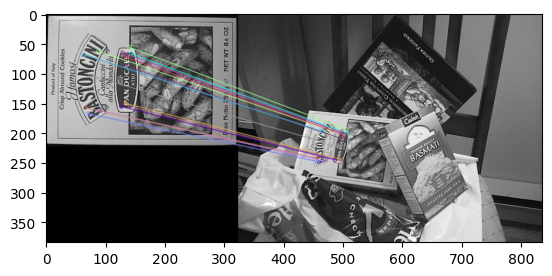

In [25]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

#1
src1 = cv2.imread('/content/drive/MyDrive/Image/box.png')
src2 = cv2.imread('/content/drive/MyDrive/Image/box_in_scene.png')

img1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)

#2-1 객체 형성 & 키포인트와 디스크립터

#img1은 query 영상, img2는 train 영상
#특징 매칭은 query영상의 각 특징점에 대해 매칭되는 train 영상의 특징점을 descriptor를 통해 찾는다.
orbF = cv2.ORB.create()
kp1, des1 = orbF.detectAndCompute(img1, None)
kp2, des2 = orbF.detectAndCompute(img2, None)

#2-2
##briskF = cv2.BRISK.create()
##kp1, des1 = briskF.detectAndCompute(img1, None)
##kp2, des2 = briskF.detectAndCompute(img2, None)

#3-1 매칭 객체 DMatch 생성
# 이진 디스크립터이기 때문에 Hamming 거리 사용
# crossCheck=True 1 -> 2, 2 -> 1 양방향 체크를 해서 매칭오류(outlier)가 적다
bf = cv2.BFMatcher.create(cv2.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)

#3-2 # 매칭 객체 DMatch 생성
#이진 디스크립터이나 32비트 실수로 변환하면 Norm_L2 매칭 사용
#flan = cv2.FlannBasedMatcher.create()
#matches = flan.match(np.float32(des1), np.float32(des2))

#4 reverse = False 이므로 distance가 낮은 순서대로 match 순서 변경
matches = sorted(matches, key = lambda x: x.distance)
print('len(matches)=', len(matches))

#query 이미지 인덱스, train 이미지 인덱스, 하밍거리 반환
for i, m in enumerate(matches[:3]):
    print(f'matches[{i}] = (queryIdx:{m.queryIdx}, trainIdx:{m.trainIdx}, distance:{m.distance}')

#distance 임계치 설정 -> 임계치보다 작다 : good_matches
minDist = matches[0].distance
good_matches = list(filter(lambda x: x.distance <= max(2 * minDist, 30), matches))

print('len(good_matches)=', len(good_matches))

#good_matches 수가 너무 작으면?
#투영 변환을 위해 최소 4점이면 충분하지만 정확히 4점인 경우 틀어진다.
if len(good_matches) < 5:
    print('Sorry, too small good matches')
    exit()

#flag = 2 : 매칭이 없는 특징점은 원으로 표시 x
dst = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.imshow(dst)
plt.show()

### cv2.findHomography 함수로 투영 변환.

1. 두 이미지 간의 특징점 매칭을 바탕으로 각 이미지에서의 특징점 좌표를 3차원 배열로 변환합니다.
```python
#good_matches의 query 이미지 좌표 kp1에 대한 3차원 ndarray
src1_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
#good_matches의 train 이미지 좌표 kp2에 대한 3차원 ndarray (좌표 수, 1, (x, y))
src2_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
```
2. 두 이미지 간의 투영 변환을 나타내는 행렬 $H$를 계산하고, 이 과정에서 `RANSAC` 방법을 사용하여 아웃라이어를 제외한 인라이어만을 고려하여 안정적인 변환 행렬 추정합니다.
```python
#src1_pts에서 src2_pts로의 투영변환 H를 RANSAC 방법으로 최대 허용 오차를 3.0으로 하여 계산한다.
#mask에서 1에 대응하는 매칭점은 lnllier, 0에 대응하는 매칭점은 outlier
H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, ransacReprojThreshold=3.0)
#1차원 리스트로...
mask_matches = list(mask.flatten())
```
3. query영상의 이미지 좌표를 변환행렬 H에 따라 변환합니다.
```python
#query영상의 이미지 모서리 좌표를 배열 pts에 저장
h, w = img1.shape
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
#이미지 모서리 좌표에 투영변환 H를 적용하여 pts2로 변환.
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2, [np.int32(pts2)], True, (0, 255, 0), 2)
```

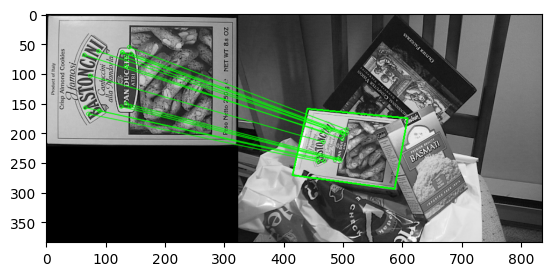

In [26]:
#good_matches의 query 이미지 좌표 kp1에 대한 3차원 ndarray
src1_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)

#good_matches의 train 이미지 좌표 kp2에 대한 3차원 ndarray (좌표 수, 1, (x, y))
src2_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

#cv2.LMEDS
#src1_pts에서 src2_pts로의 투영변환 H를 RANSAC 방법으로 최대 허용 오차를 3.0으로 하여 계산한다.
#mask에서 1에 대응하는 매칭점은 lnllier, 0에 대응하는 매칭점은 outlier
H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, ransacReprojThreshold=3.0)

#1차원 리스트로...
mask_matches = list(mask.flatten())

#6
#query영상의 이미지 모서리 좌표를 배열 pts에 저장
h, w = img1.shape
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

#7
#이미지 모서리 좌표에 투영변환 H를 적용하여 pts2로 변환.
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2, [np.int32(pts2)], True, (0, 255, 0), 2)

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=None,
                   matchesMask=mask_matches,
                   flags=2)

#고오급 딕셔너리로 넣기....
dst2 = cv2.drawMatches(src1, kp1, src2, kp2, good_matches, None, **draw_params)
plt.imshow(dst2)
plt.show()

### Side notes : RANSAC(RANdom SAmple Consensus) 알고리즘


### RANSAC (RANdom SAmple Consensus)

#### 1. 모델 정의
RANSAC의 첫 번째 단계는 추정할 모델의 유형을 정의하는 것입니다. 예를 들어, 두 이미지 간의 변환 관계(예: 투영 변환)를 찾고자 한다면, 모델은 매핑 함수를 포함합니다.

#### 2. 데이터 샘플링
모델을 정의하기 위해 필요한 최소한의 점을 무작위로 선택합니다. 이 점들은 전체 데이터에서 임의로 선택되며, 일반적으로 최소한의 점 수(m)가 필요합니다.
```python
#직선을 정의하기 위해 2개의 점을 선택합니다.
indices = np.random.choice(len(x), size=2, replace=False)
        x_sample = x[indices]
        y_sample = y[indices]
```


#### 3. 모델 적합
선택된 점들을 사용하여 모델을 계산합니다. 이 단계에서는 선택된 점들을 기반으로 모델의 파라미터를 추정합니다.
```python
# 두 점을 이용하여 직선의 기울기와 절편을 계산합니다.
slope, intercept = np.polyfit(x_sample, y_sample, 1)
```

#### 4. 에러 측정
모델을 사용하여 모든 데이터 포인트에 대해 예측값을 계산합니다. 각 데이터 포인트에 대해 모델의 예측값과 실제 값 간의 차이를 계산하여 에러를 측정합니다. 이 에러는 모델의 성능을 평가하는 데 사용됩니다.
```python
# 모든 점에 대해 거리 계산
        distances = np.abs(y - (slope * x + intercept))  # 예측된 y값과 실제 y값의 차이
```

#### 5. 인라이어 판단
각 데이터 점에 대해 에러가 주어진 허용 오차(threshold) 이하인지를 판단합니다. 에러가 작으면 해당 점을 인라이어로 간주합니다. 인라이어는 모델에 잘 맞는 점을 의미합니다. 반대로, 에러가 큰 점들은 아웃라이어로 분류됩니다.
```python
inliers = distances < threshold  # 허용 오차 이내의 점들
```

#### 6. 최적 모델 선택
위의 과정을 여러 번 반복하여, 각 반복에서 인라이어의 개수를 세고, 가장 많은 인라이어를 가진 모델을 찾습니다. 일반적으로 이 단계에서는 여러 번 샘플링을 수행합니다.
```python
# 가장 많은 인라이어가 있는 모델 선택
        if np.sum(inliers) > len(best_inliers):
            best_inliers = inliers
            best_slope = slope
            best_intercept = intercept

```

#### 7. 최종 모델
모든 반복이 완료된 후, 인라이어가 가장 많은 모델이 최종적으로 선택됩니다. 이 모델은 아웃라이어의 영향을 최소화하면서도 데이터에 잘 맞는 모델입니다.

### RANSAC의 특징
- **강인성**: 아웃라이어의 영향을 줄이기 때문에, 실제 데이터에서 발생할 수 있는 노이즈에 강합니다.
- **확률적 방법**: RANSAC은 무작위 샘플링에 기반하기 때문에, 매번 같은 결과를 보장하지는 않습니다. 하지만 충분히 많은 반복을 수행하면 신뢰할 수 있는 모델을 찾을 가능성이 높습니다.
- **적용 범위**: RANSAC은 다양한 모델(직선, 곡선, 변환 등)에 적용될 수 있습니다.

---

### LMEDS (Least Median of Squares)

LMEDS는 RANSAC과 유사하게 아웃라이어의 영향을 줄이기 위한 방법이지만, 접근 방식이 다릅니다. LMEDS는 주로 회귀 분석에서 사용됩니다.

#### 1. 모델 정의
추정할 모델을 정의합니다. 예를 들어, 데이터를 기반으로 한 직선이나 다항식 형태일 수 있습니다.

#### 2. 모델 적합
데이터의 모든 점을 고려하여 모델을 적합합니다. 여러 모델을 테스트할 수 있지만, 여기서는 기본적으로 하나의 모델을 설정하고 이를 데이터를 통해 최적화합니다.

```python
 # 모든 점에 대해 모델 적합
    for i in range(len(x)):
        for j in range(i + 1, len(x)):
            x_sample = x[[i, j]]
            y_sample = y[[i, j]]

             # 직선의 기울기와 절편 계산
            slope, intercept = np.polyfit(x_sample, y_sample, 1)

```

#### 3. 잔차 계산
모델의 예측값과 실제 데이터 간의 차이를 계산하여 잔차를 구합니다. 잔차는 모델이 얼마나 잘 작동하는지를 보여주는 지표입니다. 각 데이터 포인트에 대해 잔차를 구합니다.

```python
# 모든 점에 대해 거리 계산
            distances = np.abs(y - (slope * x + intercept))
            inliers = distances < 1  # 허용 오차 이내의 점들
```

#### 4. 중위수 계산
모든 잔차를 정렬하여 중간값, 즉 중위수를 계산합니다. 중위수는 극단값(아웃라이어)의 영향을 덜 받기 때문에, 데이터의 중심 경향을 잘 나타냅니다.

```python
# 잔차 중위수 계산
            residuals = distances[inliers]
            if len(residuals) > 0:
                median_residual = np.median(residuals)
```

#### 5. 최적 모델 선택
중위 잔차가 가장 작은 모델을 선택합니다. 이 모델은 아웃라이어의 영향을 최소화하여 데이터에 적합합니다. 즉, 아웃라이어가 적은 점들로부터 정보를 더 잘 추출합니다.
```python
# 중위수가 최소인 모델 선택
                if len(inliers) > len(best_inliers) or (len(inliers) == len(best_inliers) and median_residual < np.median(np.abs(y - (best_slope * x + best_intercept)))):
                    best_inliers = inliers
                    best_slope = slope
                    best_intercept = intercept

```

### LMEDS의 특징
- **강인성**: LMEDS는 아웃라이어의 영향을 줄이기 위해 잔차의 중위수를 사용합니다. 따라서 극단값에 의해 왜곡되지 않아서 강인성이 높습니다.
- **효율성**: 모든 가능한 조합을 고려하는 RANSAC과 달리, LMEDS는 특정 모델에 대해 더 효율적으로 작동할 수 있습니다.
- **적용 가능성**: LMEDS는 회귀 분석과 같은 다양한 데이터 적합 문제에서 유용하게 사용될 수 있습니다.

---

### 요약

- **RANSAC**: 아웃라이어를 피하기 위해 여러 번 샘플링하고, 각 모델에 대해 인라이어를 세어 최적의 모델을 선택합니다. **무작위성**이 있으나 강인한 성능을 제공합니다.
  
- **LMEDS**: 잔차의 중위수를 사용하여 아웃라이어의 영향을 최소화하고, 최적 모델을 찾습니다. 주로 회귀 분석에서 사용되며 강인성이 뛰어납니다.

이 두 방법 모두 데이터의 노이즈와 아웃라이어를 효과적으로 다루기 위해 설계되었으며, 다양한 분야에서 모델 추정 및 적합에 활용됩니다.

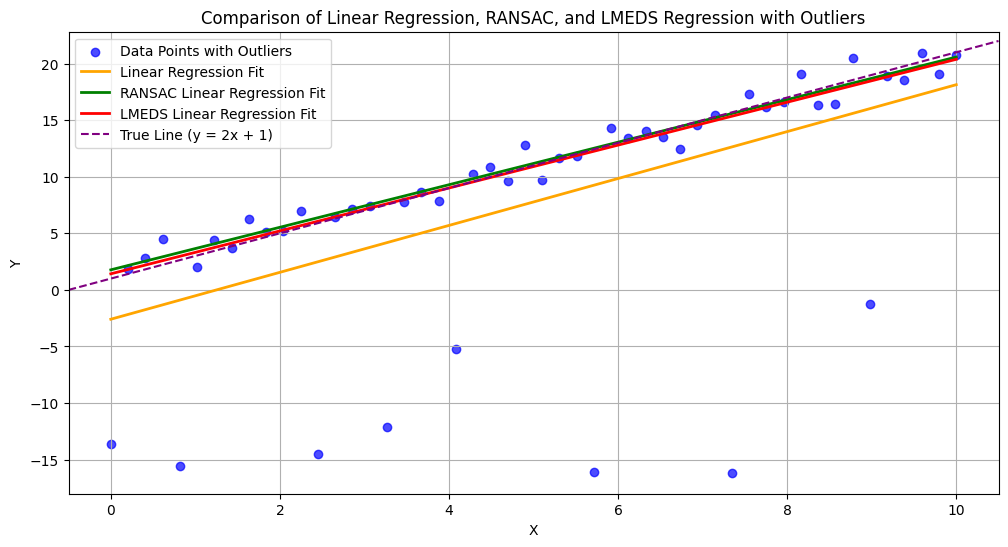

Linear Regression - Slope: 2.072776981317587, Intercept: -2.5917939955823295
RANSAC - Slope: 1.880493388410501, Intercept: 1.7737528675786685
LMEDS - Slope: 1.8956433659915892, Intercept: 1.4225830210029347


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

# 데이터 생성
np.random.seed(0)
x = np.linspace(0, 10, 50).reshape(-1, 1)  # x 값을 2D 배열로 변환
y = 2 * x.flatten() + 1 + np.random.normal(0, 1, size=x.shape[0])  # 직선에 노이즈 추가

# 아웃라이어 추가: 매 5번째 점을 아웃라이어로 설정
y[::4] = np.random.uniform(-20, 20, size=len(y[::4]))  # 매 5번째 점을 -10에서 20 사이의 값으로 설정

# 기본 선형 회귀 모델 생성
linear_model = LinearRegression()
linear_model.fit(x, y)
y_linear_pred = linear_model.predict(x)

# RANSAC 모델 생성
ransac_model = RANSACRegressor(estimator=LinearRegression(), min_samples=0.5, residual_threshold=5.0)
ransac_model.fit(x, y)
y_ransac_pred = ransac_model.predict(x)

# LMEDS 모델 생성
lmeds_model = TheilSenRegressor()
lmeds_model.fit(x, y)
y_lmeds_pred = lmeds_model.predict(x)

# 결과 시각화
plt.figure(figsize=(12, 6))

# 원래 데이터 포인트
plt.scatter(x, y, color='blue', label='Data Points with Outliers', alpha=0.7)

# 기본 선형 회귀 직선
plt.plot(x, y_linear_pred, color='orange', label='Linear Regression Fit', linewidth=2)

# RANSAC 회귀 직선
plt.plot(x, y_ransac_pred, color='green', label='RANSAC Linear Regression Fit', linewidth=2)

# LMEDS 회귀 직선
plt.plot(x, y_lmeds_pred, color='red', label='LMEDS Linear Regression Fit', linewidth=2)

# 원래 직선
plt.axline((0, 1), slope=2, color='purple', linestyle='dashed', label='True Line (y = 2x + 1)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Linear Regression, RANSAC, and LMEDS Regression with Outliers')
plt.legend()
plt.grid()
plt.show()

# 모델의 기울기와 절편 출력
print(f'Linear Regression - Slope: {linear_model.coef_[0]}, Intercept: {linear_model.intercept_}')
print(f'RANSAC - Slope: {ransac_model.estimator_.coef_[0]}, Intercept: {ransac_model.estimator_.intercept_}')
print(f'LMEDS - Slope: {lmeds_model.coef_[0]}, Intercept: {lmeds_model.intercept_}')


## SIFT를 사용한 매칭과 투영변환: knnMatch()

```python
nndrRatio = 0.45
good_matches = [f1 for f1, f2 in matches if f1.distance < nndrRatio * f2.distance]
```

len(matches)= 604
matches[0] = (queryIdx:0, trainIdx:336, distance:212.0023651123047)
matches[1] = (queryIdx:1, trainIdx:336, distance:230.9567108154297)
matches[2] = (queryIdx:2, trainIdx:941, distance:119.62859344482422)


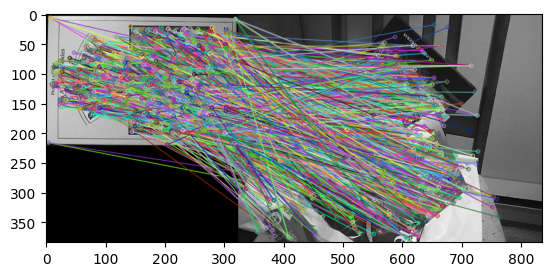

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#1
src1 = cv2.imread('/content/drive/MyDrive/Image/box.png')
src2 = cv2.imread('/content/drive/MyDrive/Image/box_in_scene.png')
img1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)

#2
siftF = cv2.SIFT.create()
kp1, des1 = siftF.detectAndCompute(img1, None)
kp2, des2 = siftF.detectAndCompute(img2, None)

#3-1
bf = cv2.BFMatcher.create()
matches = bf.knnMatch(des1, des2, k = 2)

#3-2
##flan = cv2.FlannBasedMatcher.create()
##matches = flan.knnMatch(des1, des2, k = 2 )

#3-3
print('len(matches)=', len(matches))
for ik, m in enumerate(matches[:3]):
    print(f'matches[{ik}] = (queryIdx:{m[0].queryIdx}, trainIdx:{m[0].trainIdx}, distance:{m[0].distance})')

dst = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, flags=0)
plt.imshow(dst)
plt.show()


len(good_matches)= 38


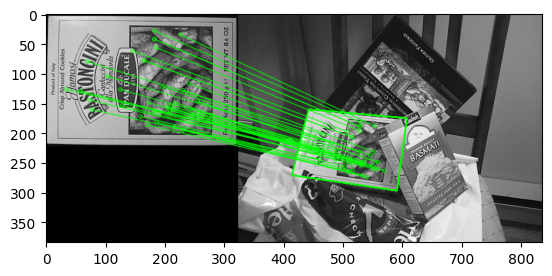

In [55]:
#4: find good matches
#NNDR(Nearest neighbor distance ratio)를 사용하여 good matches를 찾는다.
nndrRatio = 0.45
good_matches = [f1 for f1, f2 in matches if f1.distance < nndrRatio * f2.distance]

#위 함수랑 같은거임
## good_matches = []
##for f1, f2 in matches:  #k = 2
##    if f1.distance < nndrRatio * f2.distance:
##        good_matches.append(f1)

print('len(good_matches)=', len(good_matches))

if len(good_matches) < 5:
    print('Sorry, too small good matches')
    exit()

#5
src1_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
src2_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

##
H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.LMEDS, ransacReprojThreshold=2.0)
mask_matches = list(mask.flatten())

#6
h, w = img1.shape
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2, [np.int32(pts2)], True, (0, 255, 0), 2)

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=None,
                   matchesMask=mask_matches,
                   flags=2)

dst2 = cv2.drawMatches(src1, kp1, src2, kp2, good_matches, None, **draw_params)
plt.imshow(dst2)
plt.show()

## SIFT를 사용한 매칭과 투영변환: radiusMatch (1)


## SIFT를 사용한 매칭과 투영변환: radiusMatch (2)

# HOG 디스크립터

# 영상 스티칭

## cv2.Sticher 클래스를 이용한 스티칭